In [2]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import STL
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
data = pd.read_excel('data/QualidadeARO3.xlsx')
data = data.drop(columns='Ihavo')

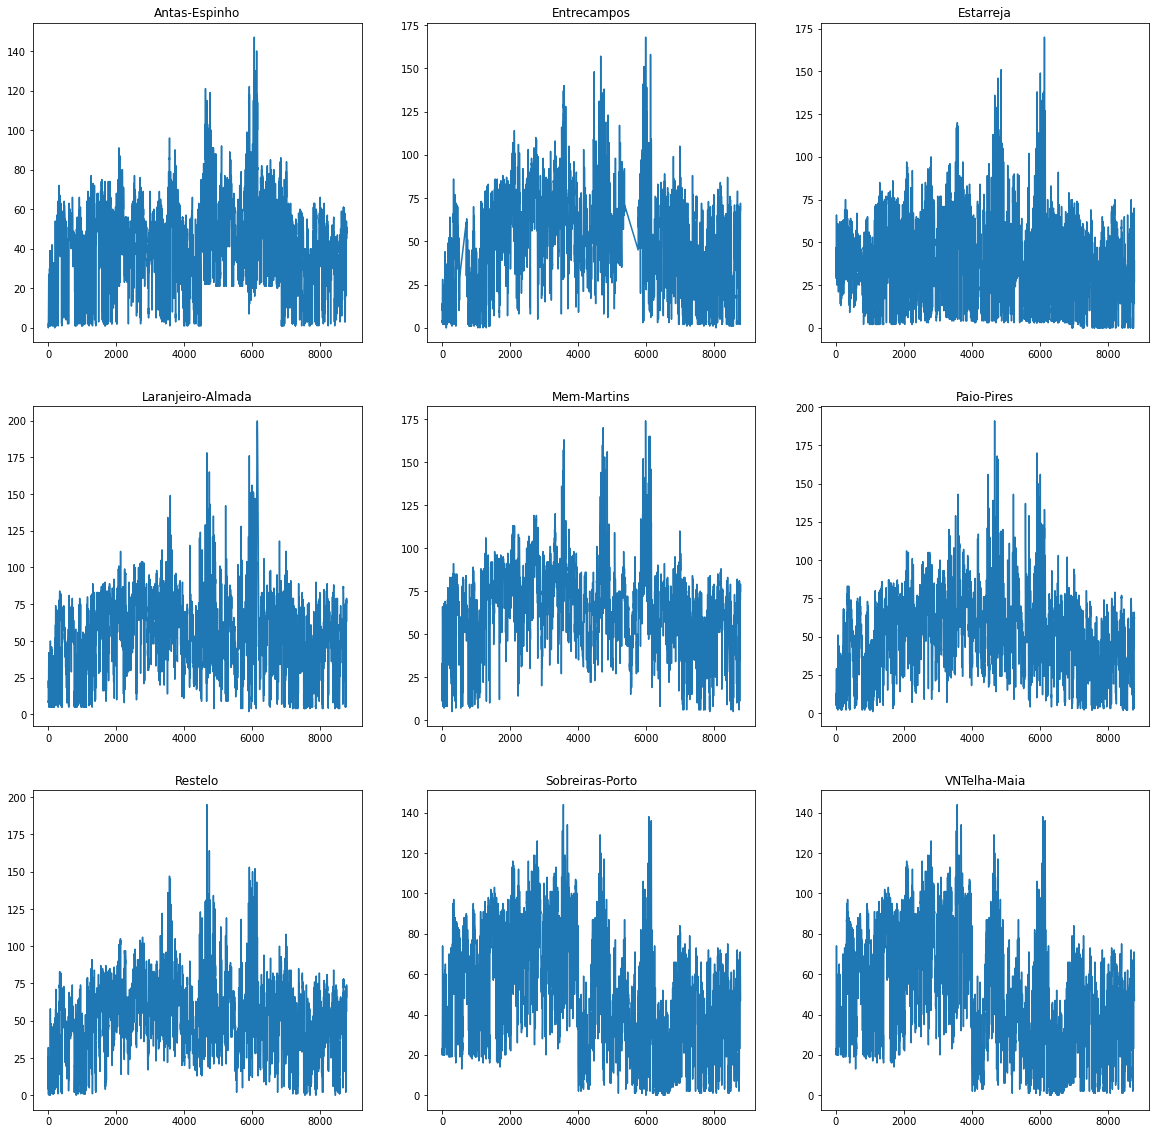

In [5]:
plt.figure(figsize=(20,20))
for idx, o2levels in enumerate(data.columns):
    plt.subplot(3, 3, idx+1)
    plt.plot(data.index, data[o2levels])
    plt.gca().set_title(o2levels)
  
plt.show()

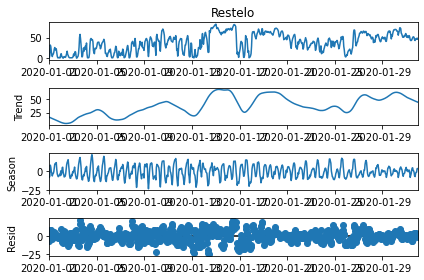

In [31]:
rng = pd.date_range('1/1/2020 00:00', periods=8784, freq='1H')
data.index = rng
restelo = data.Restelo
res = STL(restelo.head(744)).fit()
res.plot()
plt.show()

/Users/timmaier/opt/anaconda3/envs/ts/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


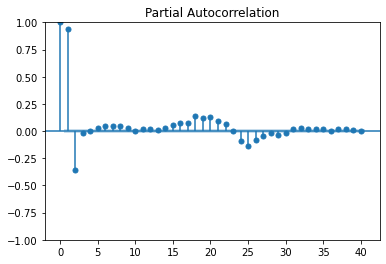

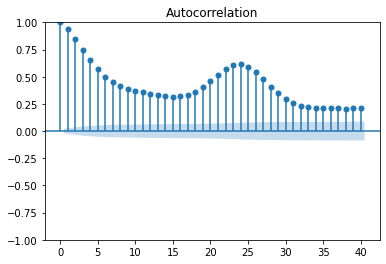

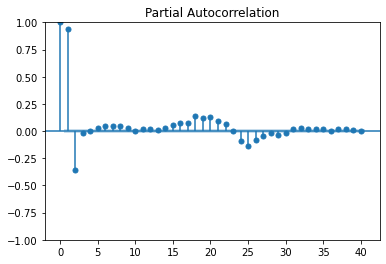

In [33]:
plot_acf(restelo)
plot_pacf(restelo)